In [1]:
import matplotlib.pyplot as plt
import cmath
import math
import meep as mp
from IPython.display import Video

-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 2D dimensions.


Computational cell is 13 x 11 x 0 with resolution 10
time for set_epsilon = 0.00793481 s
-----------
Meep: using complex fields.


/home/user/anaconda3/envs/mp/lib/python3.11/site-packages/meep/visualization.py:1402: UserWarning: Warning: The 'sim' argument in Animate2D is deprecated and has no effect. It will be removed in a future release.
  warnings.warn(


FloatProgress(value=0.0, description='0% done ', max=10.0)

Normalizing field data...
run 0 finished at t = 10.0 (200 timesteps)
Generating MP4...


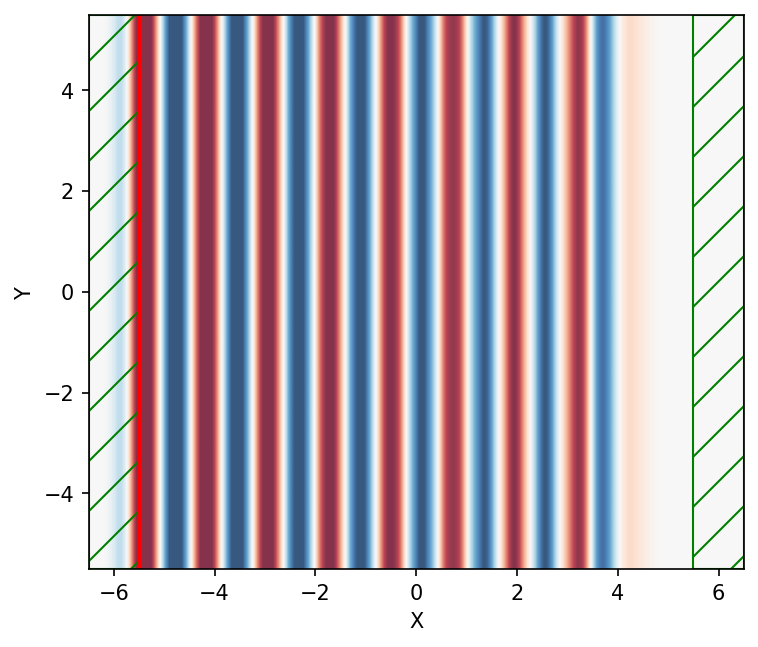

In [2]:
# This example creates an approximate Ez-polarized planewave in vacuum
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
import cmath
import math

import meep as mp

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, s, 0)

pml_layers = [mp.PML(dpml,direction=mp.X)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))

    return _pw_amp


fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1  # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    mp.Source(
        mp.ContinuousSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * s, 0),
        size=mp.Vector3(0, s),
        amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s)),
    ),
    # mp.Source(
    #     mp.ContinuousSource(fcen, fwidth=df),
    #     component=mp.Ez,
    #     center=mp.Vector3(0, -0.5 * s),
    #     size=mp.Vector3(s, 0),
    #     amp_func=pw_amp(k, mp.Vector3(y=-0.5 * s)),
    # ),
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    k_point=mp.Vector3(0,0,0),
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
)

t = 10  # run time
f = plt.figure(dpi=150)
volume = mp.Block(size=mp.Vector3(sxy,s,0), center=mp.Vector3(0,0,0))
Animate = mp.Animate2D(sim, output_plane=volume, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.1, Animate), until=t)

filename = "test.mp4"
Animate.to_mp4(10,filename)
Video(filename)